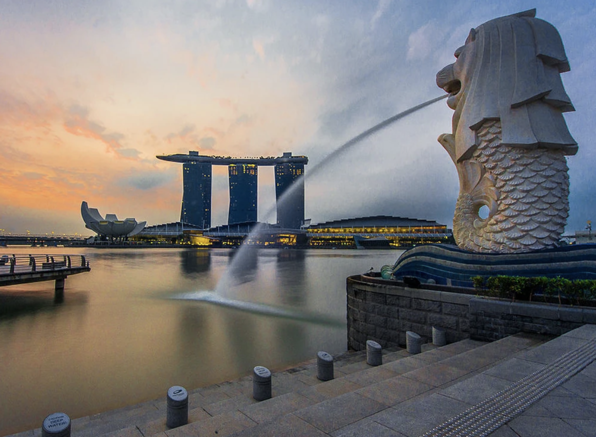

In [1]:
import requests
from PIL import Image

url = 'https://storage.googleapis.com/sfr-vision-language-research/LAVIS/assets/merlion.png' 
image = Image.open(requests.get(url, stream=True).raw).convert('RGB')   
display(image.resize((596, 437)))

In [ ]:
from transformers import AutoProcessor, Blip2ForConditionalGeneration
import torch
local_model_path = "/root/autodl-tmp/EEG2Vision/blip2"
processor = AutoProcessor.from_pretrained(local_model_path)
model = Blip2ForConditionalGeneration.from_pretrained(local_model_path, device_map="auto", load_in_8bit=True) # load in int8

/root/miniconda3/lib/python3.8/site-packages/torchvision/datapoints/__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
/root/miniconda3/lib/python3.8/site-packages/torchvision/transforms/v2/__init__.py:54: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issu

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
prompt = "this is a picture of"
inputs = processor(image, text=prompt, return_tensors="pt").to(device, torch.float16)
generated_ids = model.generate(**inputs, max_new_tokens=20)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print(generated_text)

Expanding inputs for image tokens in BLIP-2 should be done in processing. Please follow instruction here (https://gist.github.com/zucchini-nlp/e9f20b054fa322f84ac9311d9ab67042) to update your BLIP-2 model. Using processors without these attributes in the config is deprecated and will throw an error in v4.47.
Expanding inputs for image tokens in BLIP-2 should be done in processing. Please follow instruction here (https://gist.github.com/zucchini-nlp/e9f20b054fa322f84ac9311d9ab67042) to update your BLIP-2 model. Using processors without these attributes in the config is deprecated and will throw an error in v4.47.
Both `max_new_tokens` (=20) and `max_length`(=51) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


a statue with water coming out of it


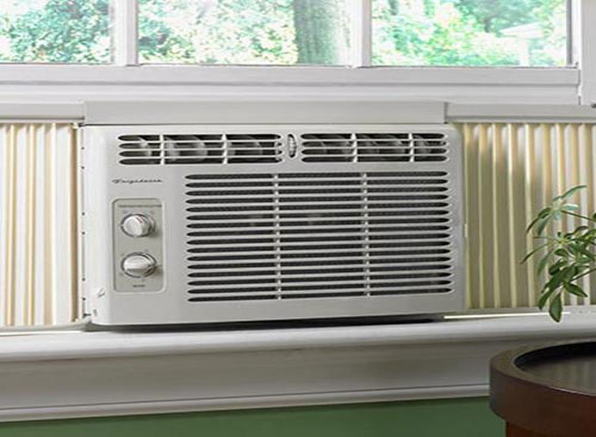

In [6]:
image_path = "/root/autodl-tmp/EEG2Vision/Image_set/training_images/00005_air_conditioner/air_conditioner_01b.jpg"  # 替换为你的图像文件路径
image2 = Image.open(image_path).convert("RGB")
display(image2.resize((596, 437)))

In [ ]:
prompt = "this is a picture of"
inputs = processor(image2, text=prompt, return_tensors="pt").to(device, torch.float16)
generated_ids = model.generate(**inputs, max_new_tokens=20)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print(generated_text)

Both `max_new_tokens` (=20) and `max_length`(=51) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


a window air conditioner


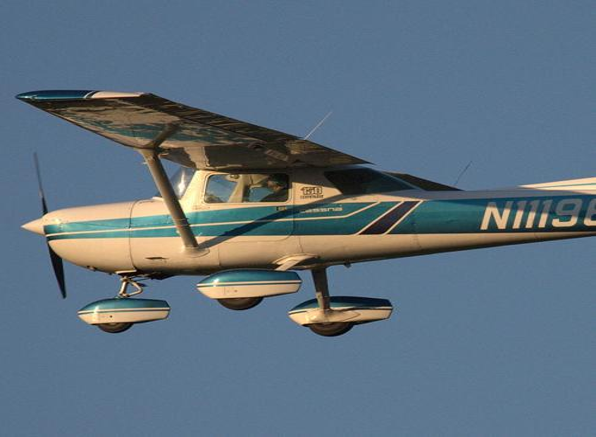

In [8]:
image_path = "/root/autodl-tmp/EEG2Vision/Image_set/training_images/00010_airplane/airplane_01b.jpg"  # 替换为你的图像文件路径
image3 = Image.open(image_path).convert("RGB")
display(image3.resize((596, 437)))

In [ ]:
prompt = "Question: Describe this picture in three words and only words. Answer:"
inputs = processor(image3, text=prompt, return_tensors="pt").to(device, torch.float16)
generated_ids = model.generate(**inputs, max_new_tokens=20)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print(generated_text)

Both `max_new_tokens` (=20) and `max_length`(=51) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


airplane, sky, landing
